# 0. Business Problem : Definition of the Problem

### Objective:

The problem we want to address is classify AF from a Short Single Lead ECG Recording. This problem was presented as a Physionet Challenge at the Computing in Cardiology 2017: [AF classification challenge](https://physionet.org/content/challenge-2017/1.0.0/).

According to the challenge: ''The 2017 PhysioNet/CinC Challenge aims to encourage the development of algorithms to classify, from a single short ECG lead recording (between 30 s and 60 s in length), whether the recording shows 
* Normal Sinus Rhythm
* Atrial Fibrillation (AF)
* Alternative Rhythm#
* Noisy recording 

The data consisted on one short single ECG recordings. ECG recordings were sampled as **300 Hz** and they have been **band pass filtered** by the recording device.

The aim is trying to **machine learning model that is abel to correctly classify the short single lead ECG into categories**. First thing establish the problem. This is a *supervised problem*: **multiclassification**.

### Motivation:

**Atrial Fibrillation** is an irregular and often very rapid heart rhythm that can lead to blood clots in the heart and is the most common type of treated heart arrhythmia. When a person has AF, the normal beating in the upper chambers of the heart (the two atria) is irregular, and blood doesn’t flow as well as it should from the atria to the lower chambers of the heart (the two ventricles). In 2019 (in the US), AF was mentioned on 183,321 death certificates and was the underlying **cause of death in 26,535 of those deaths**.

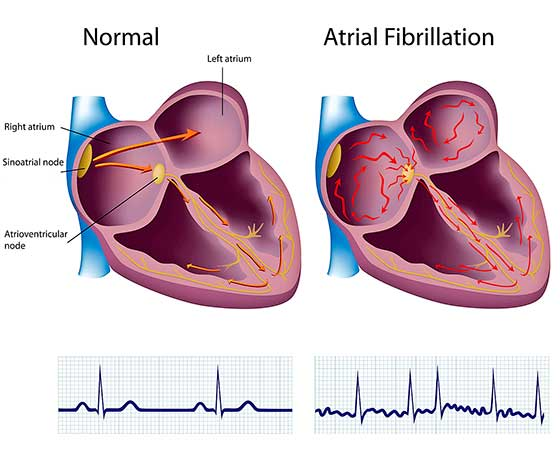

# 1. Machine Learning problem : Classification problem

### 1.0. Data Gathering 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the signals from the training.zip 
df = pd.read_csv("Signals.csv",sep=',')
df.index += 1 # We want the index to start from 1

In [3]:
signals = df.T
signals.head()

,1,2,3,4,5,6,7,8,9,10,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
val_1,-127.0,128.0,56.0,519.0,-188.0,-266.0,21.0,-187.0,51.0,-1028.0,...,559.0,250.0,592.0,488.0,-275.0,-131.0,-561.0,-59.0,189.0,8.0
val_2,-162.0,157.0,73.0,619.0,-239.0,-316.0,22.0,-236.0,56.0,-1225.0,...,670.0,294.0,701.0,582.0,-330.0,-157.0,-670.0,-66.0,223.0,-4.0
val_3,-197.0,189.0,85.0,723.0,-274.0,-367.0,24.0,-286.0,59.0,-1418.0,...,777.0,340.0,820.0,685.0,-386.0,-175.0,-785.0,-72.0,259.0,8.0
val_4,-229.0,226.0,93.0,827.0,-316.0,-407.0,26.0,-340.0,63.0,-1599.0,...,874.0,399.0,947.0,797.0,-441.0,-188.0,-904.0,-77.0,276.0,91.0
val_5,-245.0,250.0,100.0,914.0,-356.0,-423.0,28.0,-375.0,65.0,-1747.0,...,935.0,416.0,1059.0,901.0,-481.0,-190.0,-1007.0,-78.0,285.0,137.0


In [4]:
#Load the labels
Noise = open("NOISE.txt", "r").readlines()
Normal = open("NORMAL.txt", "r").readlines()
Other = open("OTHER.txt", "r").readlines()
AF = open("AF.txt", "r").readlines()
#Noise[0][6:10]

In [5]:
# Re write the labels according to match the signal database
# Create a function
def take_num(lis):
    num_sign = []
    size = len(lis)
    for i in list(range(0,size)):   
        num_sign.append(int(lis[i][6:10]))
    return num_sign

In [6]:
# Use the function
noise_signals = take_num(Noise)
normal_signals = take_num(Normal)
other_signals = take_num(Other)
af_signals = take_num(AF)

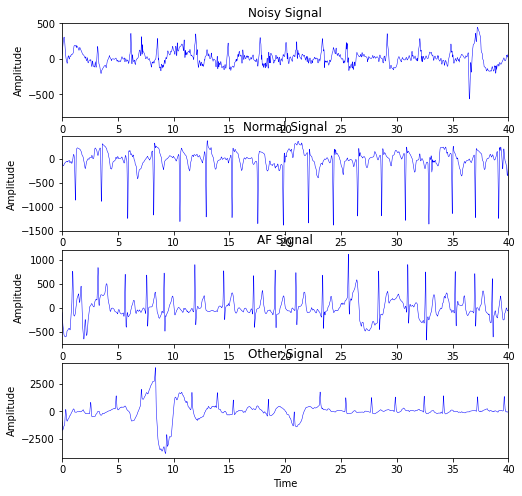

In [7]:
# Print one signal of each type
plt.rcParams["figure.figsize"] = [8, 8]

np.random.seed(0)

dt = 0.01 # sampling interval
Fs = 1 / dt # sampling frequency
t = np.arange(0, 182.6, dt)


fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows = 4)
ax1.set_title("Noisy Signal")
ax1.plot(t, signals[noise_signals[9]], color='b',linewidth=0.5)
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.set_xlim([0, 40]);

ax2.set_title("Normal Signal")
ax2.plot(t, signals[normal_signals[9]], color='b',linewidth=0.5)
ax2.set_xlabel("Time")
ax2.set_ylabel("Amplitude")
ax2.set_xlim([0, 40]);

ax3.set_title("AF Signal")
ax3.plot(t, signals[af_signals[9]], color='b',linewidth=0.5)
ax3.set_xlabel("Time")
ax3.set_ylabel("Amplitude")
ax3.set_xlim([0, 40]);

ax4.set_title("Other Signal")
ax4.plot(t, signals[other_signals[9]], color='b',linewidth=0.5)
ax4.set_xlabel("Time")
ax4.set_ylabel("Amplitude")
ax4.set_xlim([0, 40]);


plt.show()

In [8]:
print(f"Size of Noisy db: {len(noise_signals)}, Normal db: {len(normal_signals)}, Af db: {len(af_signals)} and Other db {len(other_signals)}")

Size of Noisy db: 65, Normal db: 1188, Af db: 199 and Other db 546


> The Data Base is very unbalanced, we have more signals of normal rythm. There are different solutions to balance a Data Base, in this case we will delate samples from the most 
> numeros classes. For this lab we are going to used a subset with a total of :
> * 94 Normal rhythm
> * 85 Atriaf fibrillation
> * 96 Other rhythms

In [9]:
AF_signals = signals[af_signals[0:85]]
Normal_signals = signals[normal_signals[0:94]]
Other_signals = signals[other_signals[0:96]]
Noisy_signals = signals[noise_signals[0:]]
Normal_signals.head()

,1,2,3,6,7,10,11,12,14,16,...,151,152,153,154,157,160,163,165,166,167
val_1,-127.0,128.0,56.0,-266.0,21.0,-1028.0,-69.0,72.0,-62.0,-81.0,...,-250.0,302.0,481.0,-232.0,-460.0,-3.0,-66.0,465.0,126.0,2.0
val_2,-162.0,157.0,73.0,-316.0,22.0,-1225.0,-89.0,88.0,-72.0,-96.0,...,-303.0,420.0,568.0,-278.0,-564.0,-4.0,-79.0,510.0,143.0,0.0
val_3,-197.0,189.0,85.0,-367.0,24.0,-1418.0,-108.0,103.0,-81.0,-107.0,...,-355.0,546.0,636.0,-329.0,-668.0,-6.0,-90.0,527.0,160.0,-2.0
val_4,-229.0,226.0,93.0,-407.0,26.0,-1599.0,-125.0,112.0,-88.0,-116.0,...,-410.0,674.0,692.0,-381.0,-769.0,-7.0,-101.0,527.0,178.0,-4.0
val_5,-245.0,250.0,100.0,-423.0,28.0,-1747.0,-135.0,118.0,-88.0,-123.0,...,-434.0,792.0,714.0,-417.0,-855.0,-8.0,-110.0,512.0,193.0,-6.0


In [10]:
print(f"Size of Noisy db: {Noisy_signals.shape[1]}, Normal db: {Normal_signals.shape[1]}, Af db: {AF_signals.shape[1]} and Other db {Other_signals.shape[1]}")

Size of Noisy db: 65, Normal db: 94, Af db: 85 and Other db 96


### 1.1. Signal Processing

> Once the database was balaned, we came back to MATLAB were we have all the functions that make able the signal processing(QRS detection, RR-interval measurment, filtering...)

For this particular problem, the following features were extracted (*af_dataset.csv*). 

1. **std_ecg**: Standard deviation of the ECG.
1. **var_ecg**: Variance of the ECG.
1. **kurt_ecg**: Kurtosis of the ECG.
1. **skew_ecg**: Skewness of the ECG.
1. **std_ecg_f**: Standard deviation of the filtered ECG, low pass filtered 7 Hz.
1. **var_ecg_f**: Variance of the filtered ECG, low pass filtered 7 Hz.
1. **kurt_ecg_f**: Kurtosis of the filtered ECG, low pass filtered 7 Hz.
1. **skew_ecg_f**: Skewnessof the filtered ECG, low pass filtered 7 Hz.
1. **df_ecg**: Dominant frequency of the ECG, computed using Welch Periodogram.
1. **mean_rr**: Mean of the RR-interval time series.
1. **std_rr**: Standard deviation of the RR-interval time series.
1. **std_dif_rr**: Standard deviation of the difference of the RR-interval time series.
1. **kurt_rr**: Kurtosis of the RR-interval time series.
1. **skew_rr**: Skewness of the RR-interval time series.


In [11]:
#![image.png](attachment:c6a03ee6-4b5d-450c-9311-3e4650abedd3.png)

### 1.2. Data Cleaning: preparing the data and analyzing it.

This section is composed of the following steps
    
* Checking datatypes
* Hunting null values
* Checking the distribution of features
* Decide the scaling methodology
* Checking correlations between features
* Outliers detection: graphically: box-plot and interquartile Range (IQR)
* Adding meaningful representations
* Exploring each class mean values

In [12]:
feat = pd.read_csv("af_dataset.csv",sep=',')
feat.head()

,std_ecg,var_ecg,kurt_ecg,skew_ecg,std_ecg_f,var_ecg_f,kurt_ecg_f,skew_ecg_f,df_ecg,mean_rr,std_rr,std_dif_rr,kurt_rr,skew_rr,class
0,160.659727,25811.547835,11.757043,3.053539,117.314954,13762.798366,3.321606,0.951776,3.515625,0.771600,0.030098,0.020184,-1.193953,-0.039004,N
1,181.595553,32976.944743,15.553190,2.924811,136.458660,18620.965981,4.792592,1.208073,1.171875,0.797500,0.316076,0.261958,-0.878624,-0.882280,N
2,187.838084,35283.145934,3.416507,-1.036979,174.552306,30468.507466,3.484865,-0.886573,1.171875,0.753333,0.071143,0.096958,1.534324,-0.200623,N
3,198.448587,39381.841864,18.821269,4.009359,147.529594,21764.981200,1.235905,1.360160,3.515625,0.970333,0.198430,0.259680,-1.341191,0.297276,A
4,210.180121,44175.683247,8.437067,2.317206,138.673597,19230.366452,1.215954,0.075248,4.687500,0.520175,0.192705,0.241585,1.146789,1.533024,A


#### Checking data types

In [13]:
feat.dtypes

std_ecg       float64
var_ecg       float64
kurt_ecg      float64
skew_ecg      float64
std_ecg_f     float64
var_ecg_f     float64
kurt_ecg_f    float64
skew_ecg_f    float64
df_ecg        float64
mean_rr       float64
std_rr        float64
std_dif_rr    float64
kurt_rr       float64
skew_rr       float64
class          object
dtype: object

> All the features are in their numerical formats: float64. The only one that presents other format is the class which is the target variable.

In [14]:
#feat["class"] = feat.class.astype('category')
#feat.dtypes

#### Hunting null values

In [15]:
missing_values = feat.isnull().sum()
missing_values

std_ecg       0
var_ecg       0
kurt_ecg      0
skew_ecg      0
std_ecg_f     0
var_ecg_f     0
kurt_ecg_f    0
skew_ecg_f    0
df_ecg        0
mean_rr       0
std_rr        0
std_dif_rr    0
kurt_rr       0
skew_rr       0
class         0
dtype: int64

> There are not missing values

#### Check the distribution of the features

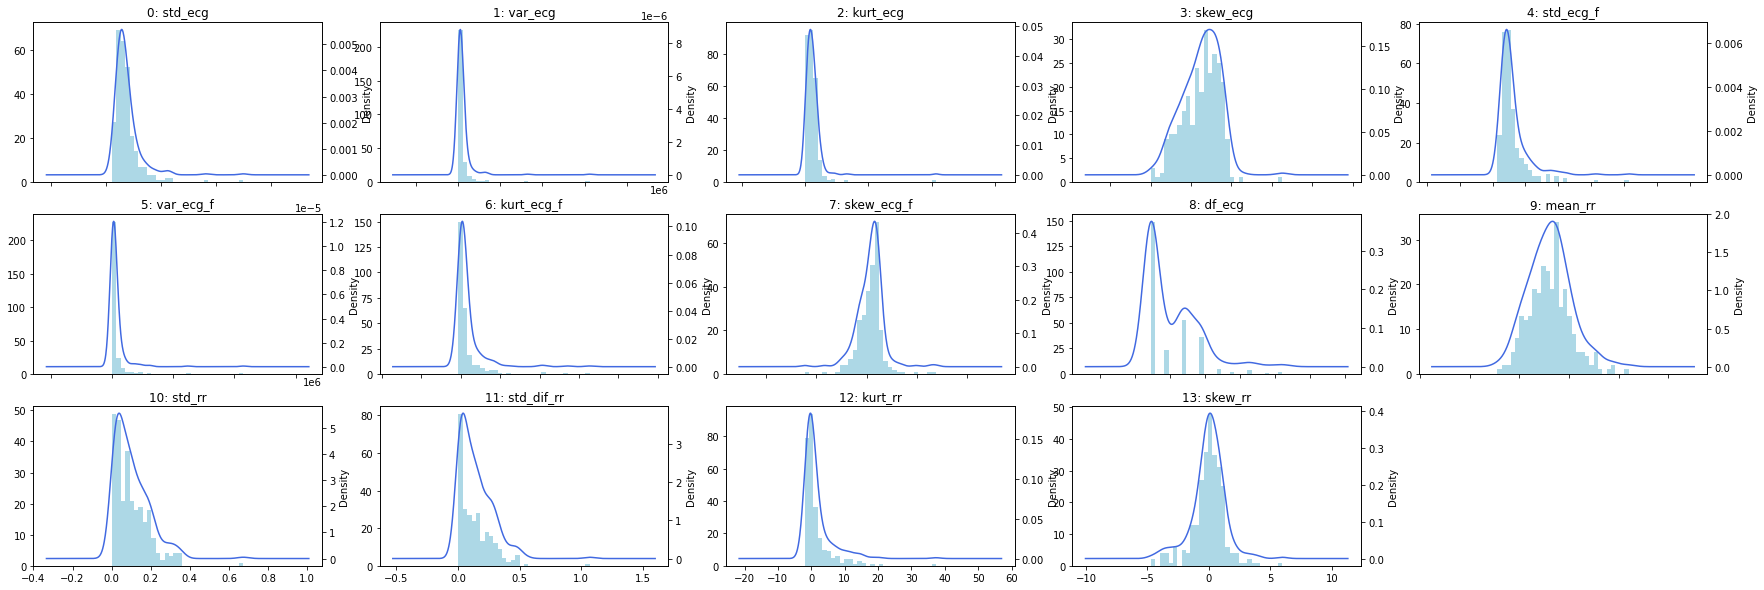

In [16]:
#Checking each variable's distribution
fig, axes = plt.subplots(3, 5, figsize=(30, 10))
X = feat.drop(columns='class')
y = feat['class']
columns = X.keys()

for i, ax in enumerate(axes.ravel()):
    if i > 13:
        ax.set_visible(False)
        continue
    ax.hist(X[columns[i]], bins=30,color='lightblue')
    ax_kde = ax.twinx()
    X[columns[i]].plot.kde(color='royalblue',ax = ax_kde)
    ax.set_title("{}: {}".format(i, X.columns[i]))

In [17]:
X.describe()

,std_ecg,var_ecg,kurt_ecg,skew_ecg,std_ecg_f,var_ecg_f,kurt_ecg_f,skew_ecg_f,df_ecg,mean_rr,std_rr,std_dif_rr,kurt_rr,skew_rr
count,275.000000,2.750000e+02,275.000000,275.000000,275.000000,2.750000e+02,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,186.159630,4.873745e+04,11.308977,1.222102,147.144659,3.349320e+04,3.922383,0.348569,2.509943,0.806663,0.103521,0.142395,1.528435,-0.027206
std,118.884112,1.144780e+05,14.239301,2.286148,109.017744,8.430805e+04,8.926124,1.258016,1.806978,0.213800,0.089461,0.135357,4.351452,1.335864
min,56.187877,3.157077e+03,-0.755183,-4.936203,36.806196,1.354696e+03,-1.401552,-6.167077,1.171875,0.279048,0.002163,0.003124,-1.972220,-4.707395
25%,122.901449,1.510489e+04,4.783825,-0.403485,89.451699,8.001812e+03,0.306439,-0.317556,1.171875,0.660575,0.032331,0.030809,-0.813176,-0.563786
50%,154.348338,2.382341e+04,9.826580,1.570435,117.591629,1.382779e+04,1.171118,0.516680,1.171875,0.803472,0.081299,0.108723,0.064633,0.050136
75%,207.556041,4.308108e+04,14.205047,2.935175,161.615636,2.611963e+04,3.305261,1.048874,3.515625,0.933131,0.153812,0.220338,1.707336,0.704845
max,1249.026329,1.560067e+06,206.764726,11.303492,1035.150949,1.071537e+06,81.692875,6.869853,10.546875,1.601389,0.673266,1.068874,37.319361,5.962291


#### Decide the scaling methodology
The distribution of each variable is different, we might need to use different scaling techniques. For example, there are some (std_rr, std_dif_rr) that has close to 0 minimum value o negative values for the min.

We will use `MinMaxScaler()` which transforms the features by scaling each to a given range between 0 and 1. This estimator scales and translates each feature individually and it is used sometimes as an alternative to the StandardScaler. The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data. The StandardScaler cannot be used since our features are not normally distributed. 

In [18]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X.iloc[:,0:10])

#X_scaled = pd.DataFrame(data = X_scaled, columns= X.iloc[:,0:10].keys())
#X_scaled.describe()

#### Correlation between features

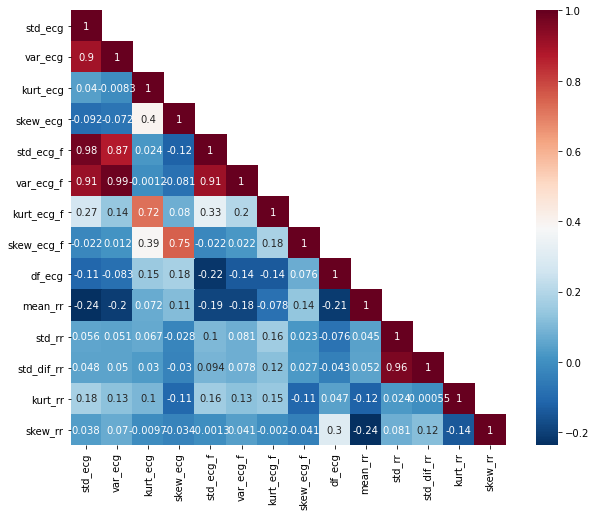

In [19]:
fig, ax = plt.subplots(figsize=(11,8))  
corrMatrix = X.corr()
mask=np.array(corrMatrix)
mask[np.tril_indices_from(mask)]=False
colormap = plt.cm.RdBu_r
sns.heatmap(corrMatrix,mask=mask,square=True,annot=True,ax=ax, cmap=colormap, linecolor='black')

plt.show()

> There are some variables that present high positive correlation, such as **var_ecg & var_ecg_f** (Corr = 0.99) , **std_ecg & std_ecg_f** (Corr = 0.98), and **var_ecg_f & std_ecg** (Corr = 0.91). 

> Graphical representation:

<Figure size 576x576 with 0 Axes>

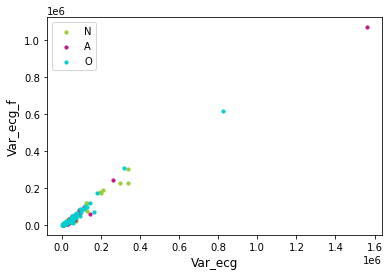

In [20]:
plt.figure()
plt.figure(figsize=(6,4))

plt.xlabel('Var_ecg',fontsize=12)
plt.ylabel('Var_ecg_f',fontsize=12)
targets = ['N','A','O']
colors = ['yellowgreen', 'mediumvioletred', 'darkturquoise']

for target, color in zip(targets,colors):
    indicesToKeep = feat['class'] == target
    plt.scatter(feat.loc[indicesToKeep, 'var_ecg']
               , feat.loc[indicesToKeep, 'var_ecg_f'], c = color, s = 10)

plt.legend(targets,prop={'size': 10})
plt.grid(False)
plt.show()

<Figure size 576x576 with 0 Axes>

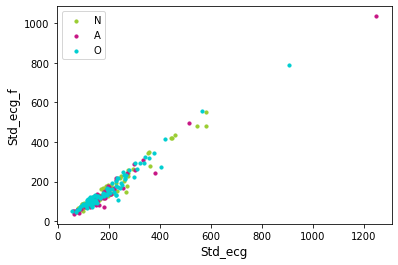

In [21]:
plt.figure()
plt.figure(figsize=(6,4))
plt.xlabel('Std_ecg',fontsize=12)
plt.ylabel('Std_ecg_f',fontsize=12)
targets = ['N','A','O']
colors = ['yellowgreen', 'mediumvioletred', 'darkturquoise']

for target, color in zip(targets,colors):
    indicesToKeep = feat['class'] == target
    plt.scatter(feat.loc[indicesToKeep, 'std_ecg']
               , feat.loc[indicesToKeep, 'std_ecg_f'], c = color, s = 10)

plt.legend(targets,prop={'size': 10})
plt.grid(False)
plt.show()

<Figure size 576x576 with 0 Axes>

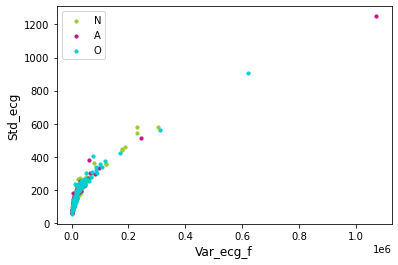

In [22]:
plt.figure()
plt.figure(figsize=(6,4))

plt.xlabel('Var_ecg_f',fontsize=12)
plt.ylabel('Std_ecg',fontsize=12)
targets = ['N','A','O']
colors = ['yellowgreen', 'mediumvioletred', 'darkturquoise']

for target, color in zip(targets,colors):
    indicesToKeep = feat['class'] == target
    plt.scatter(feat.loc[indicesToKeep, 'var_ecg_f']
               , feat.loc[indicesToKeep, 'std_ecg'], c = color, s = 10)

plt.legend(targets,prop={'size': 10})
plt.grid(False)
plt.show()

#### Outliers detection

##### Box-plot representation

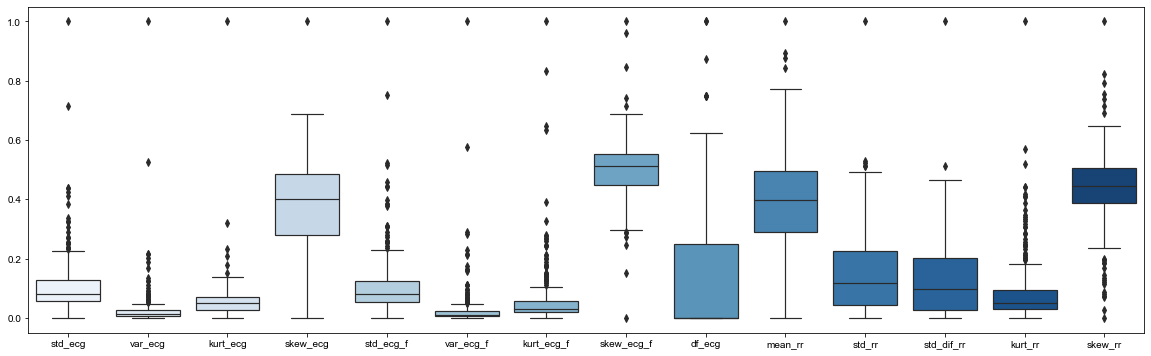

In [23]:
# First we scale to make the representation more cleat
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.iloc[:,0:14])
X_scaled = pd.DataFrame(data = X_scaled, columns= X.iloc[:,0:14].keys())

# Second, the re`resentation
fig, axes = plt.subplots(1, figsize=(20, 6))
sns.set(style='whitegrid')
sns.boxplot(data=X_scaled.iloc[:,0:14],linewidth=1.2,palette='Blues')
#sns.violinplot(data=X_scaled.iloc[:,0:14],linewidth=1.2,palette='Blues')
plt.grid(False)
plt.show()

##### IQ Range

In [24]:
# Create the function to calculate the outliers using the IQR
def outlier_function(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    upper_limit = third_quartile+(2.5*IQR)
    lower_limit = first_quartile-(2.5*IQR)
    outlier_count = 0
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [25]:
for i in X.columns:
    # only print the features where the outlier_count is bigger than 0
    if outlier_function(X, i)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(X, i)[2], i))

There are 11 outliers in std_ecg
There are 20 outliers in var_ecg
There are 4 outliers in kurt_ecg
There are 1 outliers in skew_ecg
There are 14 outliers in std_ecg_f
There are 23 outliers in var_ecg_f
There are 26 outliers in kurt_ecg_f
There are 5 outliers in skew_ecg_f
There are 2 outliers in df_ecg
There are 1 outliers in std_rr
There are 1 outliers in std_dif_rr
There are 21 outliers in kurt_rr
There are 8 outliers in skew_rr


> Since **var_ecg_f & var_acg** are very correlated we will delate the one with more otliers. The same will happen with **std_ecg & std_ecg_f**

#### Adding meaningful representations

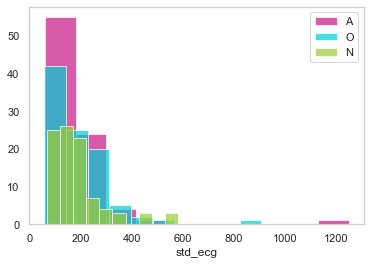

In [26]:
fig, axes = plt.subplots(1, figsize=(6, 4))
feat['std_ecg'][feat['class'] == 'A'].hist(label = 'A',alpha = 0.7, color='mediumvioletred')
feat['std_ecg'][feat['class'] == 'O'].hist(label = 'O',alpha = 0.7, color='darkturquoise')
feat['std_ecg'][feat['class'] == 'N'].hist(label = 'N',alpha = 0.7, color='yellowgreen')
plt.xlabel('std_ecg')
plt.grid(False)
plt.legend()

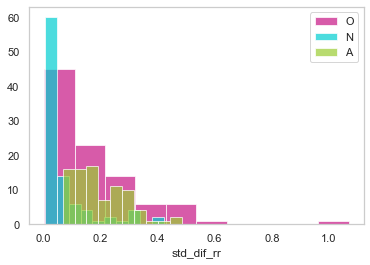

In [27]:
fig, axes = plt.subplots(1, figsize=(6, 4))
feat['std_dif_rr'][feat['class'] == 'O'].hist(label = 'O',alpha = 0.7, color='mediumvioletred')
feat['std_dif_rr'][feat['class'] == 'N'].hist(label = 'N',alpha = 0.7, color='darkturquoise')
feat['std_dif_rr'][feat['class'] == 'A'].hist(label = 'A',alpha = 0.7, color='yellowgreen')
plt.xlabel('std_dif_rr')
plt.grid(False)
plt.legend()

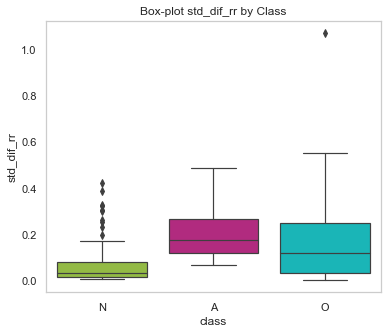

In [28]:
fig, axes = plt.subplots(1, figsize=(6, 5))
sns.set(style='whitegrid')
#sns.boxplot(data=data_2d,linewidth=1.2,palette='viridis')
my_pal = {"A": "mediumvioletred", "N": "yellowgreen", "O":"darkturquoise"}
sns.boxplot(data = feat,y = 'std_dif_rr',x = 'class',linewidth=1.2,palette=my_pal)
plt.grid(False)
plt.title('Box-plot std_dif_rr by Class')
plt.show()

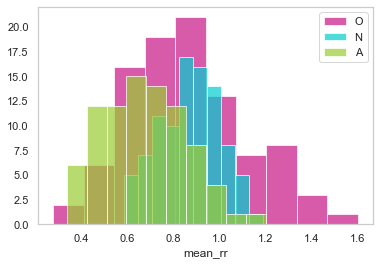

In [29]:
fig, axes = plt.subplots(1, figsize=(6, 4))
feat['mean_rr'][feat['class'] == 'O'].hist(label = 'O',alpha = 0.7, color='mediumvioletred')
feat['mean_rr'][feat['class'] == 'N'].hist(label = 'N',alpha = 0.7, color='darkturquoise')
feat['mean_rr'][feat['class'] == 'A'].hist(label = 'A',alpha = 0.7, color='yellowgreen')
plt.xlabel('mean_rr')
plt.grid(False)
plt.legend()

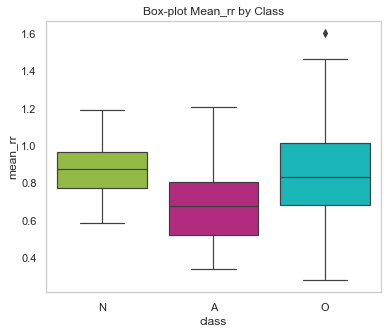

In [30]:
fig, axes = plt.subplots(1, figsize=(6, 5))
sns.set(style='whitegrid')
#sns.boxplot(data=data_2d,linewidth=1.2,palette='viridis')
my_pal = {"A": "mediumvioletred", "N": "yellowgreen", "O":"darkturquoise"}
sns.boxplot(data = feat,y = 'mean_rr',x = 'class',linewidth=1.2,palette=my_pal)
plt.grid(False)
plt.title('Box-plot Mean_rr by Class')
plt.show()

> Observing the histograms and the box-plot we can notice that seems easier to diferentiate between Normal Rythm and Atrial Fibirllation 

#### Exploring each class mean values

In [31]:
round(feat.groupby('class').agg(['mean','std']),3)

std_ecg             var_ecg             kurt_ecg         skew_ecg  \
          mean      std       mean         std     mean     std     mean   
class                                                                      
A      178.020  136.187  50019.606  169232.532   10.368   8.964    1.431   
N      186.963  106.957  46273.090   64382.388   10.800   7.699    0.978   
O      192.580  114.298  50015.214   91693.776   12.640  21.281    1.276   

             std_ecg_f           ... mean_rr        std_rr        std_dif_rr  \
         std      mean      std  ...    mean    std   mean    std       mean   
class                            ...                                           
A      2.119   135.160  118.836  ...   0.679  0.176  0.135  0.063      0.198   
N      2.293   150.366  102.081  ...   0.867  0.133  0.065  0.076      0.070   
O      2.420   154.601  106.750  ...   0.860  0.257  0.113  0.107      0.164   

             kurt_rr        skew_rr         
         std    mean    std    mean    std  
class                                       
A      0.095   1.004  4.602   0.671  1.051  
N      0.091   1.074  3.579  -0.326  1.120  
O      0.169   2.438  4.697  -0.353  1.521  

[3 rows x 28 columns]

> Looking at the table, we can observe that most of the mean values are similar between classes. We will need a combination of them to diferentiate between classes 

### 1.3. Feature Engineering: creating new features and cleaning the data

* Handling outliers
* Dropping irrelevant features
* Preprocessing pipeline
* Checking feature importance
* Applying PCA

In [32]:
#Importing needed libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler)
from sklearn.impute import (
    SimpleImputer, KNNImputer)
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import IsolationForest
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
import sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression


sklearn.set_config(display="diagram")

In [33]:
#Before feature engineering we need to split the data
#using sklearn to split data
from sklearn.model_selection import train_test_split
feature_names = feat.columns[:-1]

X = feat[feature_names]
y = feat['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [34]:
print(X_train.shape)
print(y_train.shape)

(220, 14)
(220,)


> It is importnat to know that from now on, we cannot touch the TEST SET.

#### Handling outliers

In [35]:
for i in X_train.columns:
    # only print the features where the outlier_count is bigger than 0
    if outlier_function(X_train, i)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(X_train, i)[2], i))

There are 10 outliers in std_ecg
There are 18 outliers in var_ecg
There are 4 outliers in kurt_ecg
There are 1 outliers in skew_ecg
There are 12 outliers in std_ecg_f
There are 21 outliers in var_ecg_f
There are 19 outliers in kurt_ecg_f
There are 5 outliers in skew_ecg_f
There are 2 outliers in df_ecg
There are 1 outliers in std_rr
There are 1 outliers in std_dif_rr
There are 15 outliers in kurt_rr
There are 6 outliers in skew_rr


> Our proposed (Isolation Forest) method takes advantage of 3 anomalies' quantitative properties: 
> * they are the majority consisting of fewer instances and 
> * they have attribute-values that are very different from those of normal instances.

In [36]:
from sklearn.ensemble import IsolationForest
iso_05 = IsolationForest(contamination=0.05)
yhat_05 = iso_05.fit_predict(X_train)
# select all rows that are not outliers
mask_05 = yhat_05 != -1
X_05, y_05 = X_train.iloc[mask_05, :], y_train.iloc[mask_05]
print(X_05.shape)

(209, 14)


Text(0.5, 1.0, 'Isolatio Forest, contamination: 0,5')

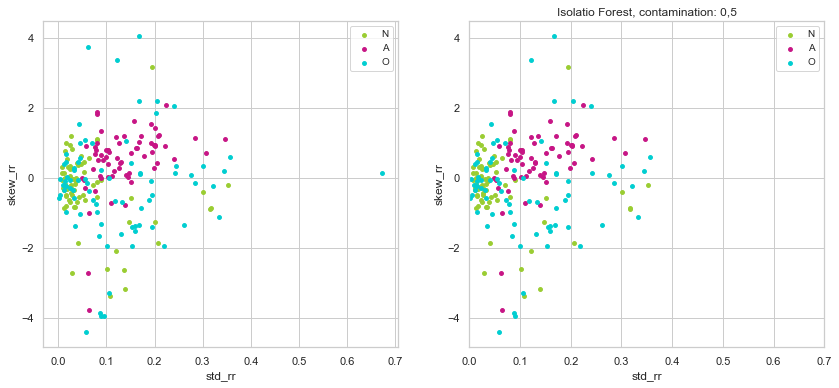

In [37]:
import matplotlib.pyplot as plt

fig, (ax_1, ax_2) = plt.subplots(ncols=2, figsize =(14,6))
targets = ['N','A','O']
colors = ['yellowgreen', 'mediumvioletred', 'darkturquoise']
plt.xlim([0.0, 0.7])

for target, color in zip(targets,colors):
    indicesToKeep = y_train == target
    ax_1.scatter(X_train.loc[indicesToKeep, 'std_rr']
               , X_train.loc[indicesToKeep, 'skew_rr'], c = color, s = 15)
ax_1.legend(targets,prop={'size': 10})
ax_1.set_xlabel('std_rr',fontsize=12)
ax_1.set_ylabel('skew_rr',fontsize=12)

for target, color in zip(targets,colors):
    indicesToKeep = feat['class'] == target
    ax_2.scatter(X_05.loc[indicesToKeep, 'std_rr']
               , X_05.loc[indicesToKeep, 'skew_rr'], c = color, s = 15)

ax_2.legend(targets,prop={'size': 10})
ax_2.set_xlabel('std_rr',fontsize=12)
ax_2.set_ylabel('skew_rr',fontsize=12)
ax_2.set_title('Isolatio Forest, contamination: 0,5')

In [38]:
for i in X_05.columns:
    # only print the features where the outlier_count is bigger than 0
    if outlier_function(X_05, i)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(X_05, i)[2], i))

There are 3 outliers in std_ecg
There are 10 outliers in var_ecg
There are 1 outliers in kurt_ecg
There are 8 outliers in std_ecg_f
There are 16 outliers in var_ecg_f
There are 17 outliers in kurt_ecg_f
There are 1 outliers in skew_ecg_f
There are 2 outliers in df_ecg
There are 14 outliers in kurt_rr
There are 5 outliers in skew_rr


In [39]:
#Coding the 
# translate the variables into numbers
#N = 0, A = 1, O = 2
y_train_aux = np.zeros(len(y_05))
y_train_aux[y_05 == 'N'] = 0
y_train_aux[y_05 == 'A'] = 1
y_train_aux[y_05 == 'O'] = 2
y_train = y_train_aux.copy()

y_test_aux = np.zeros(len(y_test))
y_test_aux[y_test == 'N'] = 0
y_test_aux[y_test == 'A'] = 1
y_test_aux[y_test == 'O'] = 2
y_test = y_test_aux.copy()

In [40]:
#len(y_train)

In [41]:
X_train = X_05
X_train.shape

(209, 14)

#### Dropping irrelevan features

> We are going to drip features that are highlty correalted

#### Preprocessing pipeline

1. Delate features that are highly correlated
    * var_ecg_f
    * std_ecg_f
2. Normalization: we are going to normalize the features in order to obtain features thar are scaled. It is importnat to remeber that we will need to normalize the test set in the same way.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#my_scaler = MinMaxScaler()
#X_scaled = pd.DataFrame(data = my_scaler.fit_transform(X_train),columns=X_train.keys())
#X_scaled.describe()

In [43]:
X_train.keys()

Index(['std_ecg', 'var_ecg', 'kurt_ecg', 'skew_ecg', 'std_ecg_f', 'var_ecg_f',
       'kurt_ecg_f', 'skew_ecg_f', 'df_ecg', 'mean_rr', 'std_rr', 'std_dif_rr',
       'kurt_rr', 'skew_rr'],
      dtype='object')

In [44]:
ct = ColumnTransformer([
    
    ("drop_features", "drop", ["var_ecg_f","std_ecg_f"]),
   
    ("scale_variables", MinMaxScaler(), ['std_ecg', 'var_ecg', 'kurt_ecg', 'skew_ecg','kurt_ecg_f', 'skew_ecg_f', 'df_ecg', 'mean_rr', 'std_rr', 'std_dif_rr',
       'kurt_rr', 'skew_rr'])
    
],remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop_features', 'drop',
                                 ['var_ecg_f', 'std_ecg_f']),
                                ('scale_variables', MinMaxScaler(),
                                 ['std_ecg', 'var_ecg', 'kurt_ecg', 'skew_ecg',
                                  'kurt_ecg_f', 'skew_ecg_f', 'df_ecg',
                                  'mean_rr', 'std_rr', 'std_dif_rr', 'kurt_rr',
                                  'skew_rr'])])

In [45]:
X_preprocessed = pd.DataFrame(data = ct.fit_transform(X_train),columns=['std_ecg', 'var_ecg', 'kurt_ecg', 'skew_ecg','kurt_ecg_f', 'skew_ecg_f', 'df_ecg', 'mean_rr', 'std_rr', 'std_dif_rr',
       'kurt_rr', 'skew_rr'])

#### Checking feature importance

In [46]:
ridge_mod = LogisticRegression(max_iter=10000,penalty='l2')
print("Accuracy = {:.4}".format(np.mean(cross_val_score(ridge_mod, X_preprocessed, y_train, cv=5))))

Accuracy = 0.6408


In [47]:
def get_feature_importance(clf, feature_names):
    """
    Function to print the most important features of a logreg classifier based on the coefficient values
    """
    return pd.DataFrame({'variable': feature_names, # Feature names
                         'coefficient': clf.coef_[0] # Feature Coeficients
                    }) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

In [48]:
get_feature_importance(ridge_mod.fit(X_preprocessed,y_train), X_preprocessed.columns.get_level_values(0).tolist())

,variable,coefficient
7,mean_rr,1.280000
1,var_ecg,0.140000
0,std_ecg,0.090000
4,kurt_ecg_f,0.040000
2,kurt_ecg,-0.010000
10,kurt_rr,-0.210000
3,skew_ecg,-0.340000
8,std_rr,-0.470000
11,skew_rr,-0.470000
5,skew_ecg_f,-0.480000


> We represent the most importnat features 

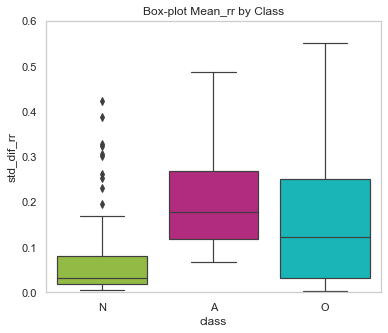

In [49]:
fig, axes = plt.subplots(1, figsize=(6, 5))
sns.set(style='whitegrid')
#sns.boxplot(data=data_2d,linewidth=1.2,palette='viridis')
my_pal = {"A": "mediumvioletred", "N": "yellowgreen", "O":"darkturquoise"}
sns.boxplot(data = feat,y = 'std_dif_rr',x = 'class',linewidth=1.2,palette=my_pal)
plt.grid(False)
plt.title('Box-plot Mean_rr by Class')
plt.ylim([0,0.6])
plt.show()

<Figure size 576x576 with 0 Axes>

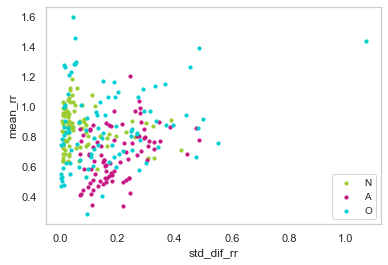

In [50]:
plt.figure()
plt.figure(figsize=(6,4))
plt.xlabel('std_dif_rr',fontsize=12)
plt.ylabel('mean_rr',fontsize=12)
targets = ['N','A','O']
colors = ['yellowgreen', 'mediumvioletred', 'darkturquoise']

for target, color in zip(targets,colors):
    indicesToKeep = feat['class'] == target
    plt.scatter(feat.loc[indicesToKeep, 'std_dif_rr']
               ,feat.loc[indicesToKeep, 'mean_rr'], c = color, s = 10)

plt.legend(targets,prop={'size': 10})
plt.grid(False)
plt.show()

#### Applying PCA

(209, 2)


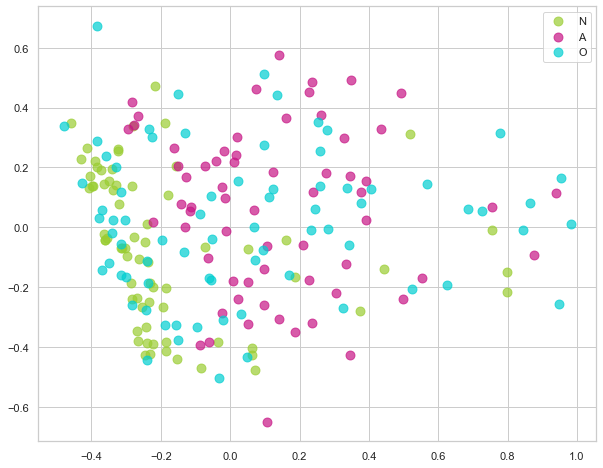

In [51]:
from sklearn.decomposition import PCA

my_pca = PCA(n_components = 2)
X_trans_plot = my_pca.fit_transform(X_preprocessed)

print(X_trans_plot.shape)
#some plotting

plt.figure(figsize = (10,8))
labels = ['N','A','O']
colors = ['yellowgreen', 'mediumvioletred', 'darkturquoise']

i = 0
for c,l in zip(colors,labels):    
    plt.scatter(X_trans_plot[y_train == i,0],X_trans_plot[y_train==i,1],c = c,alpha=0.7,s =80,label=l)
    i+= 1
    
#plt.ylim(-0.75,1)
#plt.xlim(-1,1.5)
plt.legend()

Text(0.5, 0, 'Number of components')

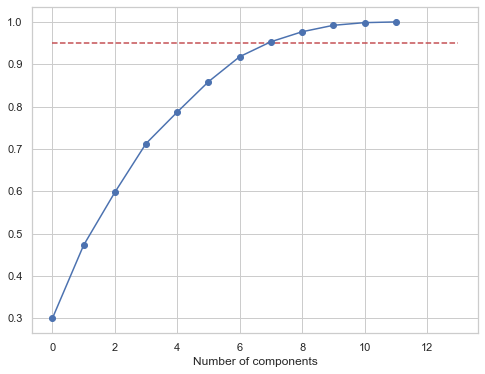

In [52]:
# Dimensionality reduction
my_pca = PCA()

my_pca.fit(X_preprocessed)

plt.figure(figsize = (8,6))
plt.plot(np.cumsum(my_pca.explained_variance_ratio_),'o-')
plt.hlines(0.95,0,13,color ='r',linestyle = '--')
plt.xlabel('Number of components')

> With 8 components we capture 95 % of the variability of the features

### 1.4. Model Training
#### Options for Models
- LDA for Multiclass Classification
- Random Forest Classifier
- SVM 
- KNN (k-nearest nieghbour)
- Multinomial logistic regression
- Ensemble trees
    - Boosting
        xgb_tree = xgboost.XGBClassifier(objective="binary:logistic", verbosity=0, random_state=42)
    - ExtraTree

In [53]:
import sklearn
import numpy as np

#Import the models that we are going to try
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from  sklearn.ensemble import AdaBoostClassifier
#!pip3 install xgboost
import xgboost as xgb

In [54]:
clf = make_pipeline(ct, LogisticRegression())
clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_features', 'drop',
                                                  ['var_ecg_f', 'std_ecg_f']),
                                                 ('scale_variables',
                                                  MinMaxScaler(),
                                                  ['std_ecg', 'var_ecg',
                                                   'kurt_ecg', 'skew_ecg',
                                                   'kurt_ecg_f', 'skew_ecg_f',
                                                   'df_ecg', 'mean_rr',
                                                   'std_rr', 'std_dif_rr',
                                                   'kurt_rr', 'skew_rr'])])),
                ('logisticregression', LogisticRegression())])

In [55]:
clf_PCA = make_pipeline(ct, PCA(n_components=8), LogisticRegression())
clf_PCA

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_features', 'drop',
                                                  ['var_ecg_f', 'std_ecg_f']),
                                                 ('scale_variables',
                                                  MinMaxScaler(),
                                                  ['std_ecg', 'var_ecg',
                                                   'kurt_ecg', 'skew_ecg',
                                                   'kurt_ecg_f', 'skew_ecg_f',
                                                   'df_ecg', 'mean_rr',
                                                   'std_rr', 'std_dif_rr',
                                                   'kurt_rr', 'skew_rr'])])),
                ('pca', PCA(n_components=8)),
                ('logisticregression', LogisticRegression())])

> Works better without PCA

In [56]:
param_grid = [
    { 
        "logisticregression": [SVC()], 
       "logisticregression__kernel" : ['poly'],
        "logisticregression__gamma": np.linspace(0.1,10.0,num=3)
    }, 
    { 
        "logisticregression": [RandomForestClassifier()], 
        "logisticregression__n_estimators": [50, 100, 150,200,250],
        'logisticregression__min_samples_split': [2,10,20],
        'logisticregression__max_depth': [5,10,20,100,150],
         "logisticregression__min_samples_leaf": [1 ,3]
    },

    {
        "logisticregression": [ExtraTreesClassifier()], 
        "logisticregression__n_estimators": [50, 100, 150],
        "logisticregression__min_samples_leaf": [2,10,20],
        "logisticregression__max_depth": [5,10,20,100,150]  
    },

#    {
#        "logisticregression": [LogisticRegression()], 
#        "logisticregression__C": range(1,5),
#        "logisticregression__penalty": ['l2']
#    
#    },
#    {
#        "logisticregression": [LinearDiscriminantAnalysis()],
#        "logisticregression__solver": ['svd', 'lsqr']
#    
#    },
        {
        "logisticregression": [KNeighborsClassifier()], 
        "logisticregression__n_neighbors": list(range(1,17,2)),
    },
    
#    {
#        "logisticregression": [xgb.XGBClassifier(max_depth=6)], 
#        "logisticregression__n_estimators": np.linspace(100, 150, num=3, dtype = int),
#    }
]
param_grid

[{'logisticregression': [SVC()],
  'logisticregression__kernel': ['poly'],
  'logisticregression__gamma': array([ 0.1 ,  5.05, 10.  ])},
 {'logisticregression': [RandomForestClassifier()],
  'logisticregression__n_estimators': [50, 100, 150, 200, 250],
  'logisticregression__min_samples_split': [2, 10, 20],
  'logisticregression__max_depth': [5, 10, 20, 100, 150],
  'logisticregression__min_samples_leaf': [1, 3]},
 {'logisticregression': [ExtraTreesClassifier()],
  'logisticregression__n_estimators': [50, 100, 150],
  'logisticregression__min_samples_leaf': [2, 10, 20],
  'logisticregression__max_depth': [5, 10, 20, 100, 150]},
 {'logisticregression': [KNeighborsClassifier()],
  'logisticregression__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}]

In [57]:
gs = GridSearchCV(clf ,param_grid=param_grid, n_jobs=-1,cv=10)
gs

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_features',
                                                                         'drop',
                                                                         ['var_ecg_f',
                                                                          'std_ecg_f']),
                                                                        ('scale_variables',
                                                                         MinMaxScaler(),
                                                                         ['std_ecg',
                                                                          'var_ecg',
                                                                          'kurt_ecg',
                                                                          'skew_ecg',
                                                                          'kurt_ecg_f',
                                                                          'skew_ecg_f',
                                                                          'df_ecg',
                                                                          'mean_rr',
                                                                          'std_rr',
                                                                          'std_dif_rr',
                                                                          'kurt_rr',
                                                                          'skew_rr'])])),
                                       ('logist...
                          'logisticregression__n_estimators': [50, 100, 150,
                                                               200, 250]},
                         {'logisticregression': [ExtraTreesClassifier()],
                          'logisticregression__max_depth': [5, 10, 20, 100,
                                                            150],
                          'logisticregression__min_samples_leaf': [2, 10, 20],
                          'logisticregression__n_estimators': [50, 100, 150]},
                         {'logisticregression': [KNeighborsClassifier()],
                          'logisticregression__n_neighbors': [1, 3, 5, 7, 9, 11,
                                                              13, 15]}])

In [58]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_features',
                                                                         'drop',
                                                                         ['var_ecg_f',
                                                                          'std_ecg_f']),
                                                                        ('scale_variables',
                                                                         MinMaxScaler(),
                                                                         ['std_ecg',
                                                                          'var_ecg',
                                                                          'kurt_ecg',
                                                                          'skew_ecg',
                                                                          'kurt_ecg_f',
                                                                          'skew_ecg_f',
                                                                          'df_ecg',
                                                                          'mean_rr',
                                                                          'std_rr',
                                                                          'std_dif_rr',
                                                                          'kurt_rr',
                                                                          'skew_rr'])])),
                                       ('logist...
                          'logisticregression__n_estimators': [50, 100, 150,
                                                               200, 250]},
                         {'logisticregression': [ExtraTreesClassifier()],
                          'logisticregression__max_depth': [5, 10, 20, 100,
                                                            150],
                          'logisticregression__min_samples_leaf': [2, 10, 20],
                          'logisticregression__n_estimators': [50, 100, 150]},
                         {'logisticregression': [KNeighborsClassifier()],
                          'logisticregression__n_neighbors': [1, 3, 5, 7, 9, 11,
                                                              13, 15]}])

In [59]:
gs.best_score_

0.7038095238095238

In [60]:
gs.best_params_

{'logisticregression': RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=10,
                        n_estimators=50),
 'logisticregression__max_depth': 100,
 'logisticregression__min_samples_leaf': 3,
 'logisticregression__min_samples_split': 10,
 'logisticregression__n_estimators': 50}

In [61]:
results = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
results[['param_logisticregression','param_logisticregression__n_estimators','mean_test_score']][0:20]

,param_logisticregression,param_logisticregression__n_estimators,mean_test_score
113,"RandomForestClassifier(max_depth=100, min_samp...",50,0.703810
93,"RandomForestClassifier(max_depth=100, min_samp...",50,0.703571
162,ExtraTreesClassifier(),50,0.703333
64,"RandomForestClassifier(max_depth=100, min_samp...",100,0.699048
128,"RandomForestClassifier(max_depth=100, min_samp...",50,0.698810
181,ExtraTreesClassifier(),100,0.698333
164,ExtraTreesClassifier(),150,0.698333
48,"RandomForestClassifier(max_depth=100, min_samp...",50,0.694524
171,ExtraTreesClassifier(),50,0.694048
190,ExtraTreesClassifier(),100,0.694048


In [62]:
opt_n_estimators = results.iloc[0]['param_logisticregression__n_estimators']
opt_max_depth = results.iloc[0]['param_logisticregression__max_depth']
opt_min_samples_leaf = results.iloc[0]['param_logisticregression__min_samples_leaf']
opt_min_samples_split = results.iloc[0]['param_logisticregression__min_samples_split']

## 2. Model evaluation

In [63]:
clf = make_pipeline(ct, RandomForestClassifier(max_depth=opt_max_depth ,n_estimators=opt_n_estimators, min_samples_leaf=opt_min_samples_leaf,min_samples_split=opt_min_samples_split))
clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_features', 'drop',
                                                  ['var_ecg_f', 'std_ecg_f']),
                                                 ('scale_variables',
                                                  MinMaxScaler(),
                                                  ['std_ecg', 'var_ecg',
                                                   'kurt_ecg', 'skew_ecg',
                                                   'kurt_ecg_f', 'skew_ecg_f',
                                                   'df_ecg', 'mean_rr',
                                                   'std_rr', 'std_dif_rr',
                                                   'kurt_rr', 'skew_rr'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=100, min_samples_leaf=3,
                                        min_samples_split=10,
                                        n_estimators=50))])

In [77]:
from sklearn.model_selection import cross_val_score
print("MSE = {0:.4f}".format(-np.mean(cross_val_score(clf, X_test, y_test, scoring='neg_mean_squared_error'))))

MSE = 1.1818


In [78]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(clf, X_test, y_test, scoring='accuracy'))))

Accuracy = 0.6182


In [79]:
clf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_features', 'drop',
                                                  ['var_ecg_f', 'std_ecg_f']),
                                                 ('scale_variables',
                                                  MinMaxScaler(),
                                                  ['std_ecg', 'var_ecg',
                                                   'kurt_ecg', 'skew_ecg',
                                                   'kurt_ecg_f', 'skew_ecg_f',
                                                   'df_ecg', 'mean_rr',
                                                   'std_rr', 'std_dif_rr',
                                                   'kurt_rr', 'skew_rr'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=100, min_samples_leaf=3,
                                        min_samples_split=10,
                                        n_estimators=50))])

In [80]:
predictions = clf.predict(X_test)

Accuracy = 0.7454545454545455

Confusion Matrix


Text(0.5, 30.5, 'Predicted label')

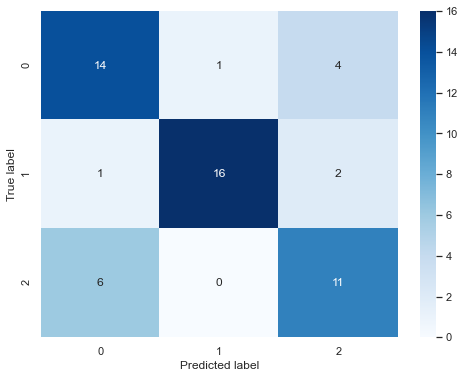

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print("Accuracy = {}".format(accuracy_score(y_test, predictions)))
print()

plt.figure(figsize = (8,6))
print("Confusion Matrix")
cm = confusion_matrix(y_test, predictions)
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues);
plt.ylabel('True label')
plt.xlabel('Predicted label')

>  Labels:
* Normal = 0
* AF = 1
* Other = 2

> We mostly care about correclty classify AF signals